In [1]:
# SE APLICA EL ALGORITMO DBSCAN CON EL MISMO OBJETIVO DESCRIPTO EN KMEANS

In [2]:
#importamos librerías

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [3]:
# IMPORTACIÓN DEL DATASET REDUCIDO LUEGO DEL PROCESAMIENTO DE COLUMNAS

df = pd.read_csv('friesgo_2018_reduc.csv',  sep=',', encoding='utf-8')

In [4]:
#muevo columnas de variables dependiendtes (enfermedades) al final

columnas_alFinal = [ 'dijeron_diabetes','veces_presion_alta', 'colesterol_alto']

df = df[[col for col in df if col not in columnas_alFinal] + columnas_alFinal]

#print (df.iloc[:,-3:]) 

In [5]:
#conjunto de datos sin las 3 columnas target y sin ID

X1 = df.iloc[:, 1:-3]  # Todas las columnas menos las últimas tres y la primera (id)

# 1) REDUCCIÓN DE DIMENSIONALIDAD

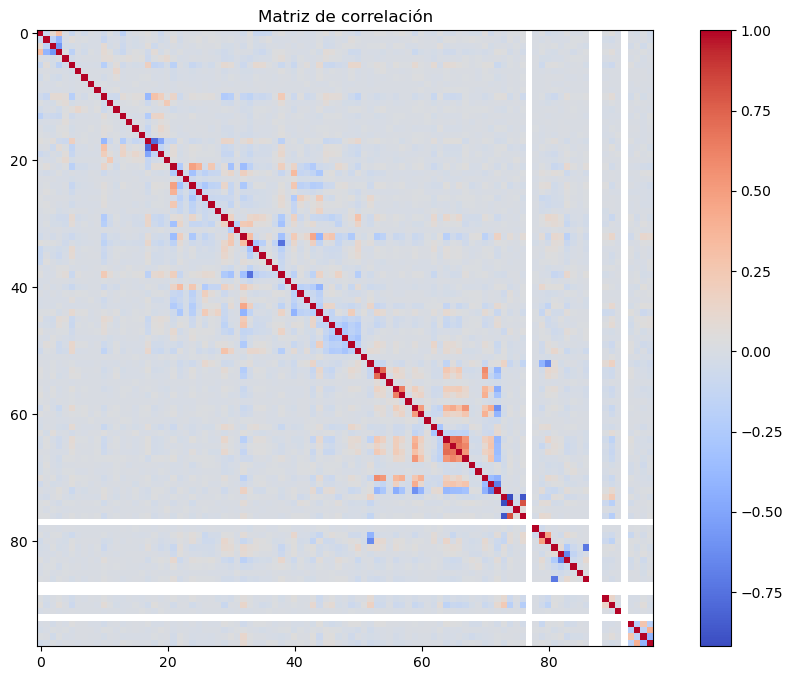

In [6]:
# Análisis de correlación 
matriz_correlacion = pd.DataFrame(X1).corr()
plt.figure(figsize=(12, 8))
plt.imshow(matriz_correlacion, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title("Matriz de correlación")
plt.show()

In [7]:
# Identificar pares de variables con alta correlación

threshold = 0.75  
high_corr = np.where(np.abs(matriz_correlacion) > threshold)
high_corr_pairs = [(matriz_correlacion.index[x], matriz_correlacion.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]

    

In [8]:
# Mostrar pares de variables altamente correlacionadas

for pair in high_corr_pairs:
    print(f"Variables altamente correlacionadas: {pair[0]} y {pair[1]} con coeficiente {matriz_correlacion.loc[pair[0], pair[1]]:.2f}")
    

Variables altamente correlacionadas: baño_1 y baño_2 con coeficiente -0.77
Variables altamente correlacionadas: alguna_vez_fumo y edad_fumo_primera_vez con coeficiente -0.92
Variables altamente correlacionadas: alguna_vez_fumo y actualmente_fuma_cigarrillos con coeficiente -0.87
Variables altamente correlacionadas: edad_fumo_primera_vez y actualmente_fuma_cigarrillos con coeficiente 0.81


In [9]:
# Lista de columnas a eliminar
#columns_to_drop = [18, 74, 76]
columns_to_drop = ['baño_2', 'edad_fumo_primera_vez', 'actualmente_fuma_cigarrillos']
#X_reduced= X1.drop(columns=columns_to_drop)
X_reduced= X1.drop(columns=columns_to_drop)


In [10]:
# Escalamos el dataset antes de correr PCA y aplicar DBscan

scaler = StandardScaler()
X= scaler.fit_transform(X_reduced)

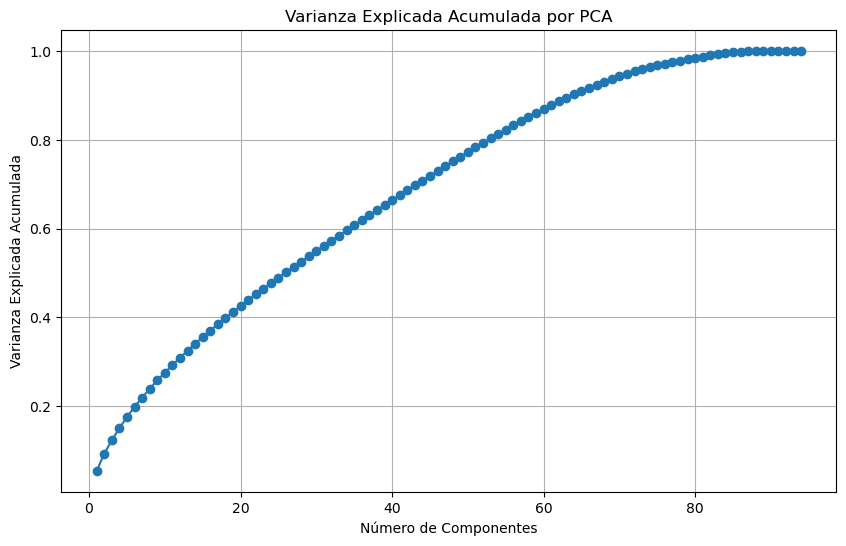

Para alcanzar al menos el 80% de la varianza explicada, se necesitan 53 componentes.


In [11]:
# Aplicamos PCA para reducir dimensionalidad

pca = PCA()

# Ajustar PCA a los datos estandarizados
X_pca = pca.fit_transform(X)


# Verificar la varianza explicada acumulada
varianza_explicada_acumulada = np.cumsum(pca.explained_variance_ratio_)


# Graficar la varianza explicada acumulada para decidir el número de componentes
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_explicada_acumulada) + 1), varianza_explicada_acumulada, marker='o')
plt.title('Varianza Explicada Acumulada por PCA')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

# Imprimir la varianza explicada acumulada con un límite de 80% o más
componentes_para_80 = np.argmax(varianza_explicada_acumulada >= 0.80) + 1
print(f"Para alcanzar al menos el 80% de la varianza explicada, se necesitan {componentes_para_80} componentes.")

In [12]:
# Reduccion de dimensionalidad

pca = PCA(n_components=53)  # Selecciona el número de componentes principales

#pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

In [13]:
# Se añade la información de los componentes principales al DataFrame original

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 
                                      'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 
                                      'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 
                                      'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 
                                      'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48', 'PC49', 
                                      'PC50', 'PC51', 'PC52', 'PC53'])


#pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

#df_merged = pd.merge(df, pca_df, right_index=True, left_index=True)

In [14]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53
0,3.791738,1.262023,3.232872,1.298348,0.539099,1.086364,-1.132417,1.810235,0.681104,-0.080305,...,0.683808,0.611430,0.230134,-0.153024,0.402348,0.280790,-1.676103,-0.420795,-1.083406,-1.847469
1,2.079394,2.860502,1.811978,0.287873,1.306301,-2.712240,0.966922,2.941824,-0.098032,1.054659,...,0.482848,0.807226,0.467348,-0.504893,-0.375071,-0.510166,-0.702761,-0.363179,-0.345394,-0.568561
2,1.616886,2.271123,-0.085933,1.913627,-2.195263,-1.266648,-0.381650,1.968661,1.126406,1.723954,...,-1.082898,-0.253737,-0.315937,-0.313778,1.241628,1.298618,-0.625598,0.884362,-0.674474,-0.624483
3,-2.917170,2.633407,1.159042,3.033542,-1.533326,-0.085635,1.034976,0.818159,1.565544,-0.199759,...,0.430429,-1.050337,-0.028372,3.057802,-0.247461,0.648777,-1.424758,-2.825965,0.976357,0.079582
4,1.890930,0.641615,0.429534,1.408739,-3.291222,2.273783,0.605034,1.914736,-0.016679,0.955726,...,-1.092246,0.445995,-1.046725,0.891199,2.016957,0.291395,-0.351438,-0.699314,0.393214,-1.847313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25632,0.442346,-1.671443,-2.389259,1.997697,0.263052,-0.273607,0.165465,0.325519,-1.776005,2.043521,...,1.525611,1.456605,-1.937455,-0.253441,1.765957,0.780340,0.102705,-0.612711,-3.450175,0.170089
25633,-1.254523,0.884754,1.822589,-2.359698,0.077487,-0.103131,-1.514483,-1.047082,-0.400464,0.290084,...,0.171503,-0.145514,0.207667,0.783841,-0.236101,0.085975,-0.615259,-0.114434,0.003170,-0.709896
25634,1.150840,1.404186,-1.764388,0.503814,2.182469,0.321354,0.433766,-3.231111,0.889947,0.593285,...,-0.060375,0.364420,-1.360246,1.153143,0.955539,-0.898673,1.508817,0.174832,0.338289,0.725631
25635,1.677834,0.147746,-1.559146,-1.341140,0.040223,-1.866356,1.263346,-2.673524,-0.853254,1.420255,...,-0.107825,-0.236442,-0.648429,0.966441,0.009602,0.013396,0.924038,0.347467,-0.088628,0.571893


# 2) ANÁLISIS DE PARÁMETROS EPS Y MIN_SAMPLES A UTILIZAR

In [15]:


from sklearn.neighbors import NearestNeighbors

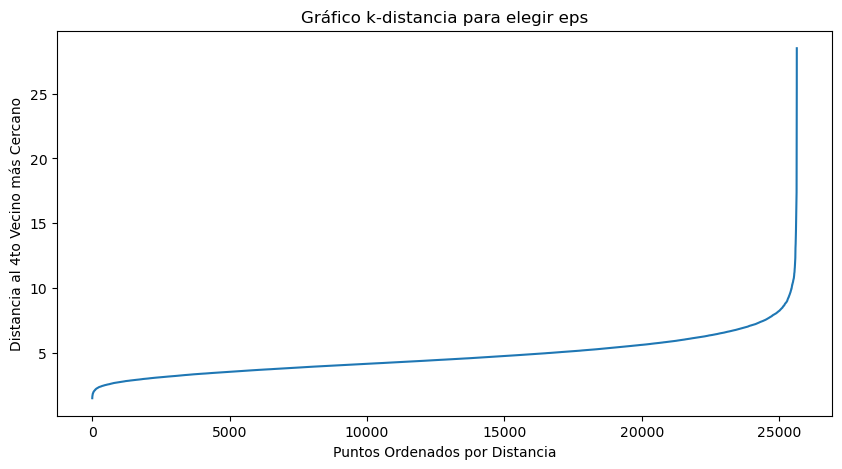

In [81]:
# Ajuste de eps utilizando gráfico k-distancia

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X_pca)
distances, indices = nbrs.kneighbors(X_pca)
distances = np.sort(distances[:, 4], axis=0)
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.xlabel('Puntos Ordenados por Distancia')
plt.ylabel('Distancia al 4to Vecino más Cercano')
plt.title('Gráfico k-distancia para elegir eps')
plt.show()

### De acuerdo a este gráfico, a partir de un eps = 5 comenzamos a tener clusters del orden de los 10000 puntos. Se debe considerar que nuestro dataset tiene un total de 25637 columnas por lo que podría ser conveniente un eps menor para obtener menos datos por cluster

# 3) CLUSTERIZACIÓN CON DBSCAN

In [116]:
# Aplicar DBSCAN
dbscan = DBSCAN(eps=9, min_samples=100).fit(pca_df)  # Ajusta 'eps' y 'min_samples' según sea necesario

# con 50 y 300 me dio 2 clusters y 112 ruidosso
labels = dbscan.fit_predict(pca_df)

labels = dbscan.labels_  # Etiquetas asignadas a cada punto

In [117]:
no_clusters = len(np.unique(labels))  # Número de clusters encontrados (excluyendo ruido)
no_noise = np.sum(np.array(labels) == -1)  # Número de puntos clasificados como ruido (outliers)
print('# Clusters estimados: %d' % no_clusters)  # Muestra el número de clusters estimado
print('# Puntos ruidosos: %d' % no_noise)  # Muestra el número de ruido

# Clusters estimados: 4
# Puntos ruidosos: 1210


In [118]:
# Agregar los labels (clusters) generados al DataFrame original

pca_df['Cluster'] = labels

In [119]:
#calculamos cuantos datos tengo en cada cluster para ver la distribucion

# Contar la cantidad de datos en cada cluster
cluster_counts = pca_df['Cluster'].value_counts()

# Imprimir el número de datos en cada cluster
print(cluster_counts)

 0    24084
-1     1210
 1      217
 2      126
Name: Cluster, dtype: int64


## CONLUSIONES:
Se observa que si bien se encuentran 3 clusters y un cluster de ruido, los que se encuentran son relativos ya que tienen muy pocos valores excepto el cluster 0 que contiene casi todos los datos. Se intentaron varias configuraciones y todas resultaron en lo mismo 1 o 2 clusters pero siempre un muy definido y el resto pequeño. 
Se realiza el análisis subsiguiente con esta configuración pero resulta evidente que este algoritmo no es el indicado para la clusterización de este grupo de datos

# 4) COMPARACIÓN DE CLUSTERS VS LAS REGIONES

In [120]:
# Crear un DataFrame con la distribución de regiones en cada cluster

cluster_region_distribution = pd.crosstab(pca_df['Cluster'], df['region'])

In [121]:
region_dict = {
    1: 'Metropolitana',
    2: 'Pampeana',
    3: 'Noroeste',
    4: 'Noreste',
    5: 'Cuyo',
    6: 'Patagónica'
}



In [122]:
# Renombrar las regiones usando el diccionario

cluster_region_distribution = cluster_region_distribution.rename(columns=region_dict)


In [123]:
print(cluster_region_distribution)


region   Metropolitana  Pampeana  Noroeste  Noreste  Cuyo  Patagónica
Cluster                                                              
-1                 217       310       216      267    82         118
 0                2944      7869      4384     3187  2254        3446
 1                  27        86        32       44     6          22
 2                  49        19        25       21    11           1


# CONCLUSIONES FINALES:  Se observan 3 clusters y uno de ruido (datos que no pudieron integrarse a ninguno de los clusters encontrados). Las regiones no parecen ser significativas en la clusterización y como se mencionó antes, el algoritmo no parece estar siendo capaz de agrupar los datos con algún sentido ya que en general todas las opciones probadas determinaron 1 cluster con muchos valores y el resto muy pequeños o 1 cluster y mucho ruido.